<center><h1>Data Cleaning</h1><center>


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [90]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [91]:
print("Sum of null values of the column Total_bedrooms : ", df['total_bedrooms'].isnull().sum())
x_mean = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(x_mean)
print("Sum of null values of the column Total_bedrooms : ", df['total_bedrooms'].isnull().sum())

Sum of null values of the column Total_bedrooms :  207
Sum of null values of the column Total_bedrooms :  0


In [92]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [93]:
ocean_prox_map = {
    "NEAR BAY": 0,
    "<1H OCEAN": 1, 
    "INLAND": 2, 
    "NEAR OCEAN": 3, 
    "ISLAND": 4
}

df["ocean_proximity"] = df["ocean_proximity"].map(ocean_prox_map)

<center><h1>Feature Selection</h1><center>

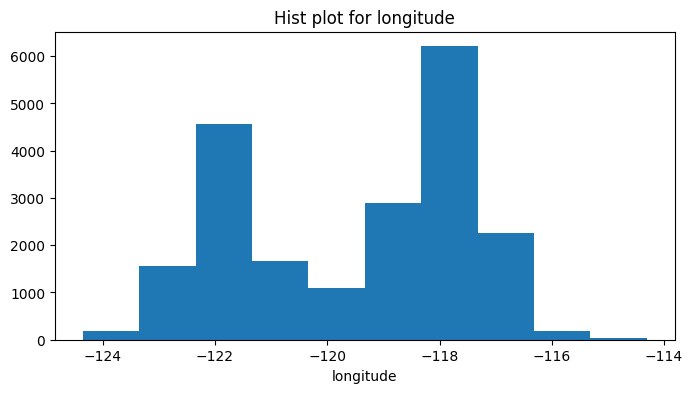

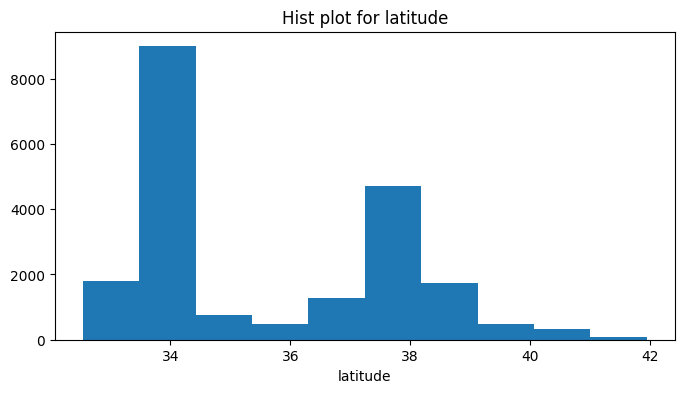

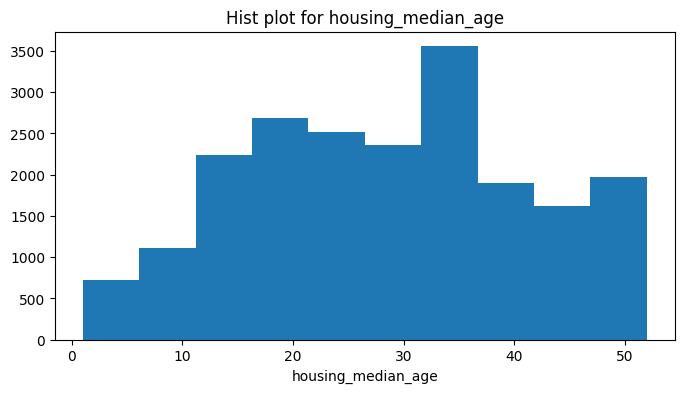

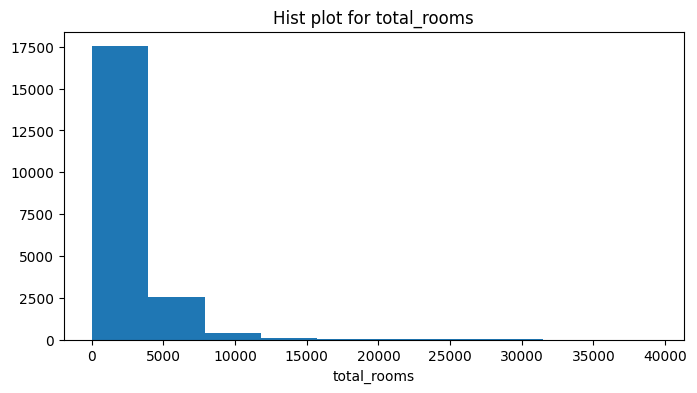

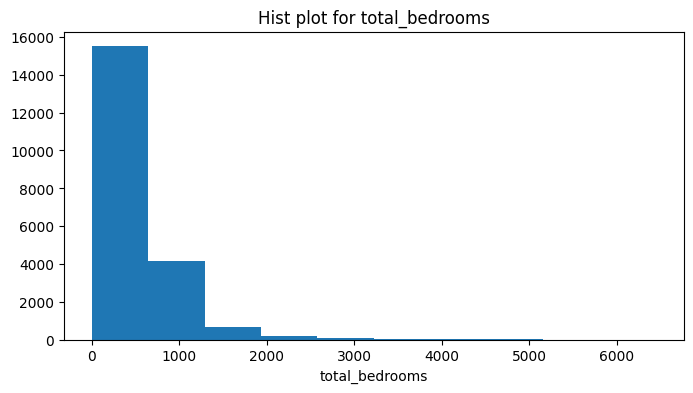

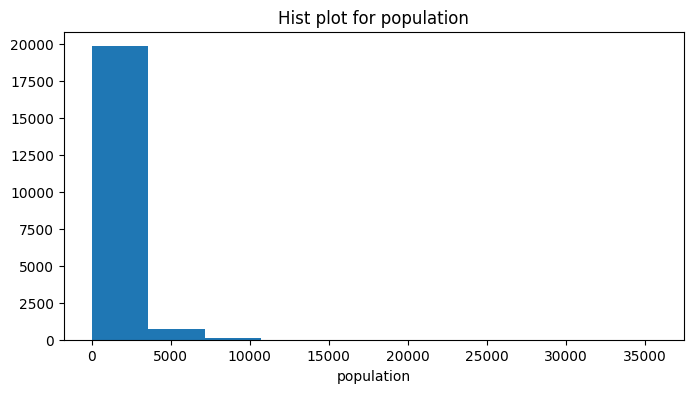

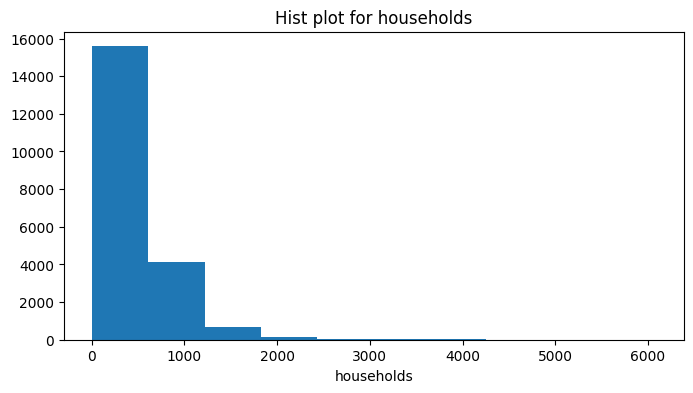

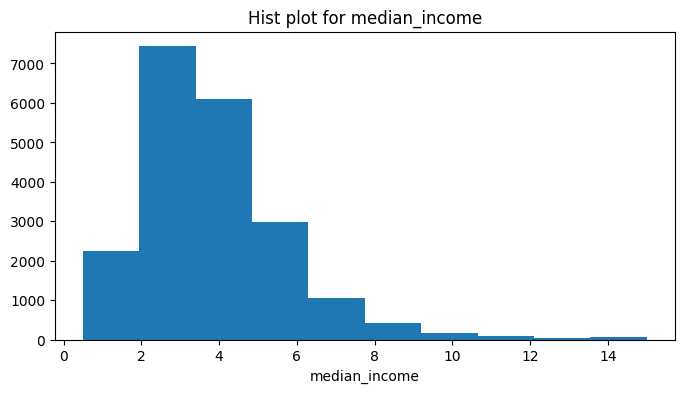

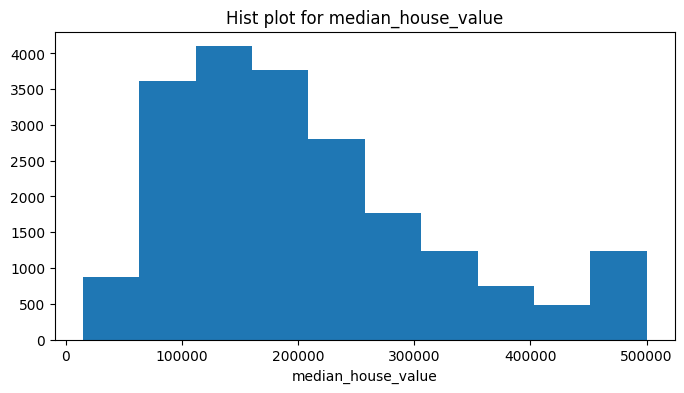

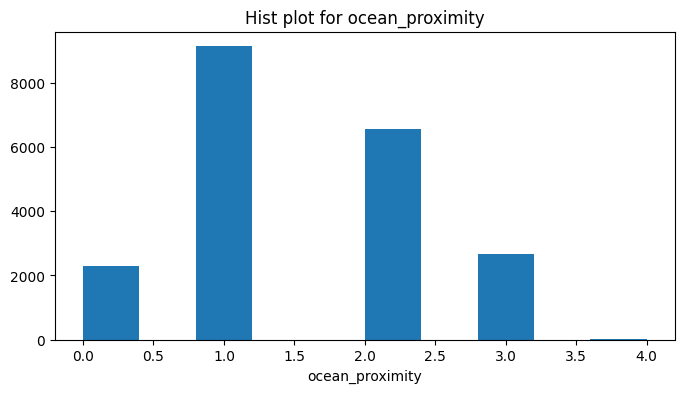

In [94]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']

for i in features:
    plt.figure(figsize = (8, 4))
    plt.hist(df[i], linewidth=0.1)
    plt.title(f'Hist plot for {i}')
    plt.xlabel(i)
    plt.show()

In [95]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.004060
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


The columns latitude and longitude, total_rooms and total_bedrooms, total_rooms and population, total_rooms and household, total_bedrooms and population, total_bedrooms and households, population and households, are highly correlated. So we can neglect some of the columns as they have the same feature infos.

In [96]:
drop_columns = ['total_bedrooms', 'population', 'households', 'latitude']
df = df.drop(drop_columns, axis=1)

<center><h1>Model Selection</h1></center>

In [97]:
#Standardization...
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
std_df = scalar.fit_transform(df.drop('ocean_proximity', axis=1))
df_std = pd.DataFrame(std_df, columns=['longitude', 'housing_median_age', 'total_rooms', 'median_income',
       'median_house_value'])
df

,longitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity
0,-122.23,41.0,880.0,8.3252,452600.0,0
1,-122.22,21.0,7099.0,8.3014,358500.0,0
2,-122.24,52.0,1467.0,7.2574,352100.0,0
3,-122.25,52.0,1274.0,5.6431,341300.0,0
4,-122.25,52.0,1627.0,3.8462,342200.0,0
...,...,...,...,...,...,...
20635,-121.09,25.0,1665.0,1.5603,78100.0,2
20636,-121.21,18.0,697.0,2.5568,77100.0,2
20637,-121.22,17.0,2254.0,1.7000,92300.0,2
20638,-121.32,18.0,1860.0,1.8672,84700.0,2


<center><h1>Training and Testing data</h1></center>

In [98]:
from sklearn.model_selection import train_test_split

X = df.drop('ocean_proximity', axis=1)
y = df['ocean_proximity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [99]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [100]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_scr = accuracy_score(y_pred, y_test)
print("Accuracy : ", accuracy_scr)


Accuracy :  0.8401162790697675


# Taking total_rooms column as feature

In [101]:
conditions = [
    (df['total_rooms'] <= 2500),
    (df['total_rooms'] > 2500) & (df['total_rooms'] <= 5000),
    (df['total_rooms'] > 5000) & (df['total_rooms'] <= 7500),
    (df['total_rooms'] > 7500) & (df['total_rooms'] <= 10000),
    (df['total_rooms'] > 10000)
]
categories = [0, 1, 2, 3, 4]

# Use np.select to assign numerical categories based on conditions
df['new_total_rooms'] = np.select(conditions, categories, default=0)

df

,longitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity,new_total_rooms
0,-122.23,41.0,880.0,8.3252,452600.0,0,0
1,-122.22,21.0,7099.0,8.3014,358500.0,0,2
2,-122.24,52.0,1467.0,7.2574,352100.0,0,0
3,-122.25,52.0,1274.0,5.6431,341300.0,0,0
4,-122.25,52.0,1627.0,3.8462,342200.0,0,0
...,...,...,...,...,...,...,...
20635,-121.09,25.0,1665.0,1.5603,78100.0,2,0
20636,-121.21,18.0,697.0,2.5568,77100.0,2,0
20637,-121.22,17.0,2254.0,1.7000,92300.0,2,0
20638,-121.32,18.0,1860.0,1.8672,84700.0,2,0


In [102]:
cols = ['longitude', 'housing_median_age', 'median_income', 'median_house_value', 'ocean_proximity']
y = df['new_total_rooms']

X = df[cols]


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [104]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("The accuracy for this model : ", accuracy_score(y_test, y_pred))

The accuracy for this model :  0.5450581395348837


# Inferences : 
#### 1. Ocean proximity as dependent variable.
<p><b>As the dependent variable was alaready a catagorical value and some of the columns was dropped because pf their high correlation. Also the value was standerdized inorder to get all the values into a smaller ranged values. And finally we got an accuracy of 0.8</b></p>

#### 2. Total Rooms as the dependent variable.
<p><b>As the total_rooms columns was not ment for the decision tree because of the continues values, we converted to classes of 5. Then without standerdizing normalizing the dataset, we performed the classifier on the training data. And we got anm accuracy of 0.5 which indicates that the column is not so good for classification.</b></p>